In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.data import get_baseline
import rubin_sim.maf as maf
import sqlite3
import pandas as pd
import os

In [2]:
filename = 'near_sun_fdw_3.00_v3.2_10yrs.db'
run_name = os.path.basename(filename.replace('.db', ''))


In [9]:
bundle_list = []
ra_plots = [maf.plots.HealpixSkyMap()]
aa_plots = [maf.plots.LambertSkyMap()]

sqls = {'note ="twilight_near_sun, 0"': '1st' , 
        'note ="twilight_near_sun, 3"': '4th'}

for sql in sqls:
    slicer = maf.HealpixSlicer()
    metric = maf.CountMetric(col='night', units='#', metric_name=sqls[sql])
    
    bundle_list.append(maf.MetricBundle(metric, slicer, sql, plot_funcs=ra_plots,run_name=run_name))
    
    slicer = maf.HealpixSlicer(lat_col='altitude', lon_col='azimuth')
    metric = maf.CountMetric(col='night', units='#', metric_name=sqls[sql]+' alt/az')
    bundle_list.append(maf.MetricBundle(metric, slicer, sql, plot_funcs=aa_plots,run_name=run_name))
    
    slicer = maf.UniSlicer()
    metric = maf.SumMetric(col="visitExposureTime")
    summary = [maf.PassMetric()]
    bundle_list.append(maf.MetricBundle(metric, slicer, sql, summary_metrics=summary,run_name=run_name))
    
    slicer = maf.HourglassSlicer()
    metric = maf.HourglassMetric()
    
    extra = ' and '
    if sql == '':
        extra = ''
    
    bundle = maf.MetricBundle(
            metric,
            slicer,
            sql + extra + ' night < 366',run_name=run_name
        )
    bundle_list.append(bundle)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


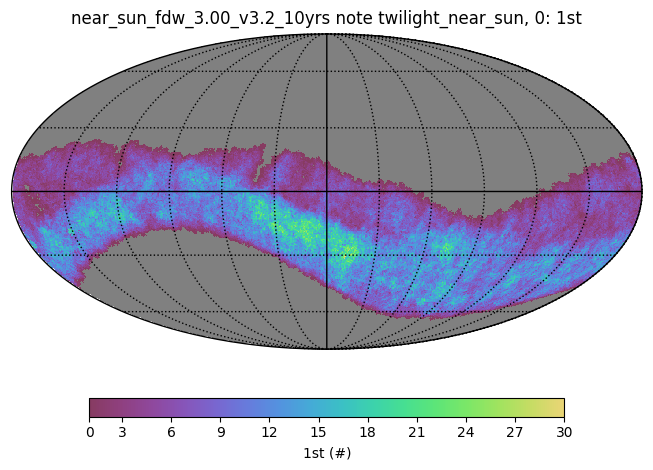

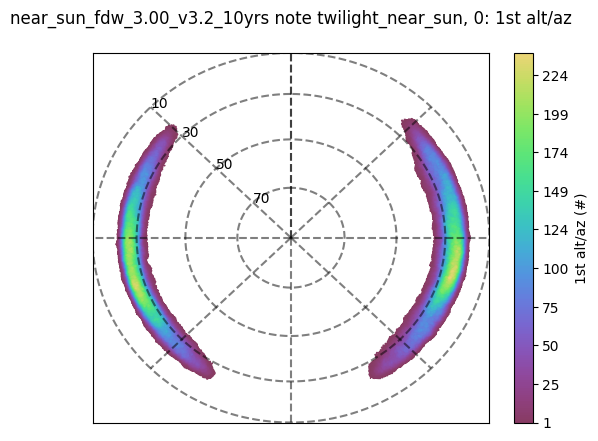

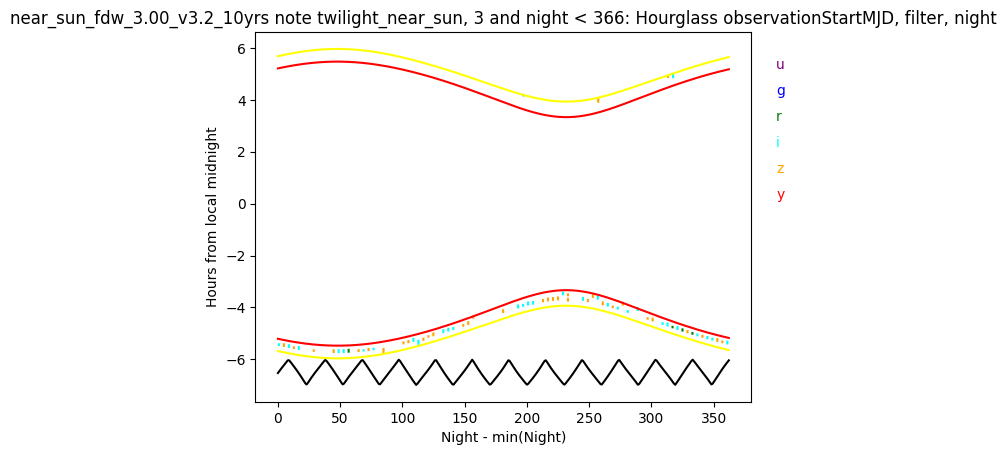

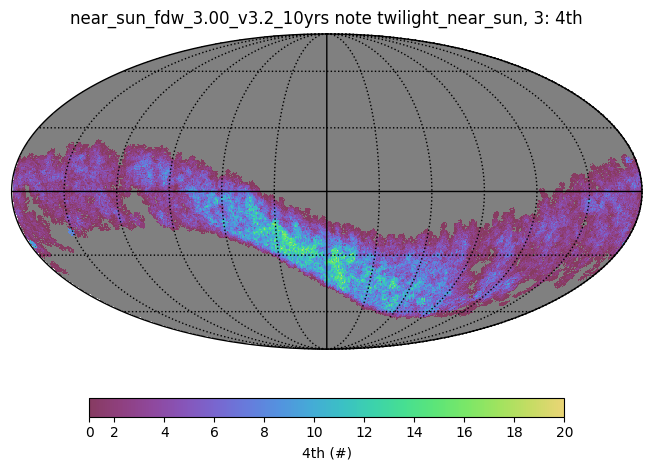

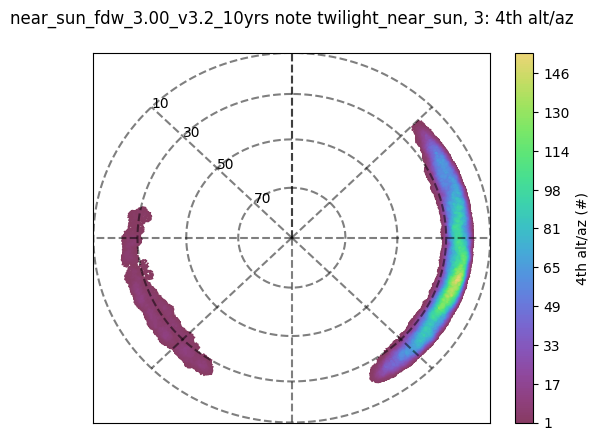

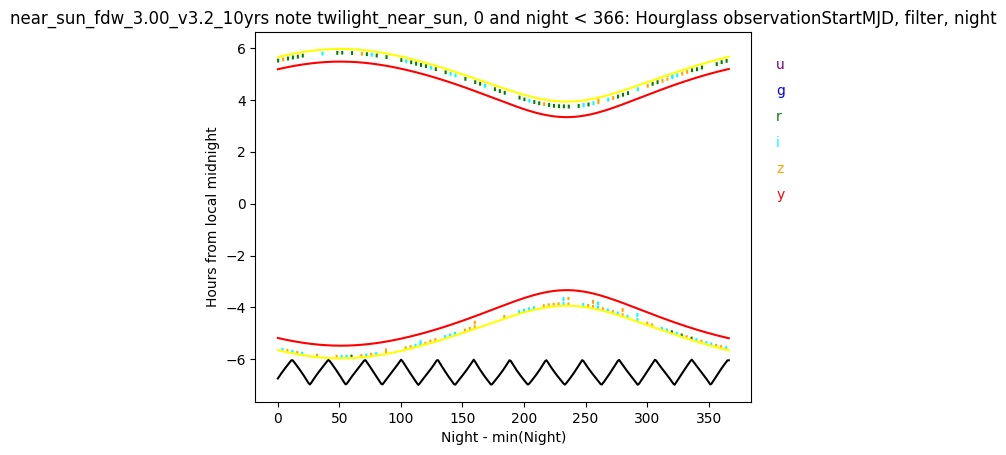

In [10]:
bd = maf.make_bundles_dict_from_list(bundle_list)
mbg = maf.MetricBundleGroup(bd, filename, 'temp')
mbg.run_all()
mbg.plot_all(closefigs=False)


In [11]:
# ok, as I expected, the one's at sunrise are failing A LOT. I guess need to start them slightly earlier?